<a href="https://colab.research.google.com/github/sasha-schaps/sasha-schaps.github.io/blob/main/Copy_of_Sasha_Schaps_FoodHubProject_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

###Project Overview
The FoodHub app offers busy students and professionals access to multiple restaurants through a single smart phone app. The app allows customers to make direct food orders online and then assigns a delivery person from FoodHub to pick up the order after it is confirmed by a restaurant.

The food aggregator company (<b>FoodHub</b>) has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.



### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ability to save as HTML
import nbconvert
from nbconvert import HTMLExporter
html_exporter = HTMLExporter()
html_exporter.template_file = 'classic'


### Understanding the structure of the data

In [ ]:
# Mount google drive to access drive files
from google.colab import drive
drive.mount('/content/drive')
# Reminder: You will be asked to grant permission for file access

Mounted at /content/drive


In [ ]:
# Read the CSV data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

In [ ]:
# Returns the first 5 rows of data
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Check the shape of the data set
len(df)
df.shape
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))

Number of rows: 1898
Number of columns: 9


#### Observations:
There are
*   <b>1898 Rows</b> and
*   <b>9 columns</b>

in the dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Check the datatypes of the different columns in the dataset
pd.set_option('display.max_columns', None)
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

#### Observations:

This includes data for
1.  unique orders (numerical),
2.  customer IDs (numerical),
3.  restaurant names (string),
4.  cuisine types (string),
5.  order costs  (numerical with decimals)
6.  when the order was made (day of the week) (string),
7.  if the order received a rating (string with null values),
8.  time it took to prepare the food (numerical), and
9.  time it took to deliver the food (numerical).

With a mix of datatypes, there's an opportunity to compare numerical values and string values and perform univariate and multivariate analysis.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Determine if there are missing values and treat the missing values
# Replace 'not given' with NaN
foodhub_data =df.replace('Not given', np.nan)

# Determine if there are missing values
missing_values = foodhub_data.isnull().sum()

# Display the missing values for each column
print(missing_values)

# Display the total number of missing values in the dataframe
total_missing_values = missing_values.sum()
print(f"\nTotal missing values: {total_missing_values}")

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

Total missing values: 736


#### Observations:
The only missing values are among the ratings, which is given the value 'Not given'. There is an opportunity to investigate this further, as 736/1898 is accounts for about 39% of orders being fufilled without customer ratings.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Determerine the minimum, average and maximum food preperation time
min_time = df['food_preparation_time'].min()
avg_time = df['food_preparation_time'].mean()
max_time = df['food_preparation_time'].max()
print(f"Minimum food preparation time: {min_time} minutes")
print(f"Average food preparation time: {avg_time} minutes")
print(f"Maximum food preparation time: {max_time} minutes")

Minimum food preparation time: 20 minutes
Average food preparation time: 27.371970495258168 minutes
Maximum food preparation time: 35 minutes


#### Observations:

* Minimum food preparation time is 20 minutes
* Average food preparation time is 27.371970495258168 minutes
* Maximum food preparation time is 35 minutes

### Recommendations:

*   Investigate relationship between food preparation time and food delivery time, as customers are likely to want a speedy service.
*   Investigate what factors are likely to influence food preparation time, do certain restaurants take longer to prepare food? Is there a greater relationship between price of order?

If FoodHub can provide strategic recommendations on how to decrease food preparation time but uphold food quality this information would be helpful to share with their business partners.





### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Determine how many orders are not rated
# Replace 'not given' with NaN
foodhub_data =df.replace('Not given', np.nan)
# Determine if there are missing values
missing_values = foodhub_data.isnull().sum()
# Display the total number of missing values in the dataframe
total_missing_values = missing_values.sum()
print(f"\nTotal orders that are not rated: {total_missing_values}")


Total orders that are not rated: 736


#### Observations:

*  736 Orders are not rated

There's an opportunity to look at if certain restaurants are related to not receiving ratings or if there's any positive or negative relationship between the ratings of null. It's beneficial for the business to encourage people to rate the service as it provides custoemrs more information about what could be improved.




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# High Level Univariate Analysis

import pandas as pd
# High Level Overview of Order Costs, Food Prep Time and Food Delivery Time -- Numerical Values
numerical_description = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].describe()
print(numerical_description.to_markdown(numalign="left"))
# High Level Overview of Restaurant Name, Cuisines, Day of the week, and rating
string_description = df[['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']].describe()
print(string_description.to_markdown(numalign="left"))
#Top visited restaurants and cuisines, by percentages and percentages of ratings and distribution of weekday vs. weekend vistors
for col in ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']:
  counts =df[col].value_counts()
  percentages =(counts/len(df))*100
  categorical_desciption = pd.DataFrame({'Count': counts, 'Percentage': percentages})
  print(categorical_desciption.head(10).to_markdown(numalign="left"),)


|       | cost_of_the_order   | food_preparation_time   | delivery_time   |
|:------|:--------------------|:------------------------|:----------------|
| count | 1898                | 1898                    | 1898            |
| mean  | 16.4989             | 27.372                  | 24.1617         |
| std   | 7.48381             | 4.63248                 | 4.97264         |
| min   | 4.47                | 20                      | 15              |
| 25%   | 12.08               | 23                      | 20              |
| 50%   | 14.14               | 27                      | 25              |
| 75%   | 22.2975             | 31                      | 28              |
| max   | 35.41               | 35                      | 33              |
|        | restaurant_name   | cuisine_type   | day_of_the_week   | rating    |
|:-------|:------------------|:---------------|:------------------|:----------|
| count  | 1898              | 1898           | 1898              | 1898      |


###Observations
* <b>Order Costs:</b> The average order cost is 14.14 dollars but the mean is higher than the 50 percentile.

This suggests that there are more orders under 14.14. This could suggest that the average customer on the FoodHub Platfrom has a particular behavior of order lower cost food or perhaps ordering for one person. This information would be helpful for the business when considering building user personas to better understand their audience.

* <b>Food Preparation Time: </b>Average time to prepare food is about 27 minutes and it's evenly distributed across the range of 20-35 minutes.
* <b>Food Delivery Time:</b>Average time to deliver food is 24 minutes and is also evenly distributed across the range of 15 to 35 minutes

It takes longer for food to be prepared than delivered. Suggesting that this may be something to incorporate or let users know to build trust in the platform.

* <b>Day of the Week:</b> 71.18% of orders were made on the weekend and 28.82% of orders were made during the week.

Most orders are made during the weekends, suggesting an opportunity to the service to offer promotions during the week to encourage more orders. Most people order on the weekends

* <b>Ratings:</b> 38.77% of orders are not given ratings, 30.98% of orders receive a rating of 5, 20.34% of orders receive a rating of 4 and 9.90% of orders receive a rating of 3.

Most people don't rate the service. There may be opportunities for the business to encourage customers to rate. It also may be important for FoodHub to evaluate the restaurants that have lower ratings, if those restuarants are not generating revenue for the platform, it's important than to determine the relationship between rating and revenue.

* <b>Most Popular Restaurant and Cuisine Type:</b> The most popular restaurant is Shake Shack and the most popular cuisine type is American.

Since Shake Shack is the most popular resturant, it could influence the outcome of cuisine type. It's important to look at the other categorical data to have a better understanding.

* <b> Popular Restaurants and Cuisine Types:</b> The top three most popular cuisine types are American, Japanese and Italian. The most popular Restaurants are Shake Shack, The MeatBall Shop and Blue Ribbon Sushi.

It would be interesting to look at the popular restaurants and their food preparation times and ratings to determine if there is a correlation. It may be most beneficial for FoodHub to look at the revenue and average order price of these restaurants and cuisine categories to determine what share of their actual business each of these categories generate.

<b> See Below Data Visualizations.</b>





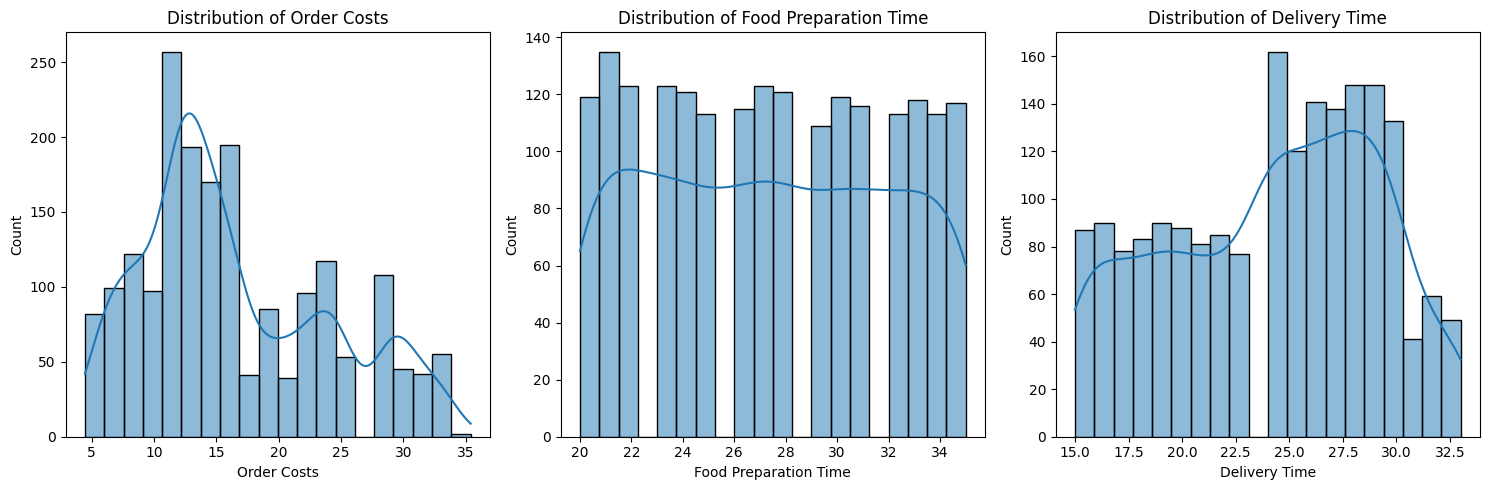

In [ ]:
# Histograms
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram for order costs
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['cost_of_the_order'], bins=20, kde=True)
plt.title('Distribution of Order Costs')
plt.xlabel('Order Costs')
plt.ylabel('Count')
#Histogram for food prep time
plt.subplot(1, 3, 2)
sns.histplot(df['food_preparation_time'], bins=20, kde=True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time')
#Histogram for delivery time
plt.subplot(1, 3, 3)
sns.histplot(df['delivery_time'], bins=20, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time')
plt.tight_layout()
plt.show()


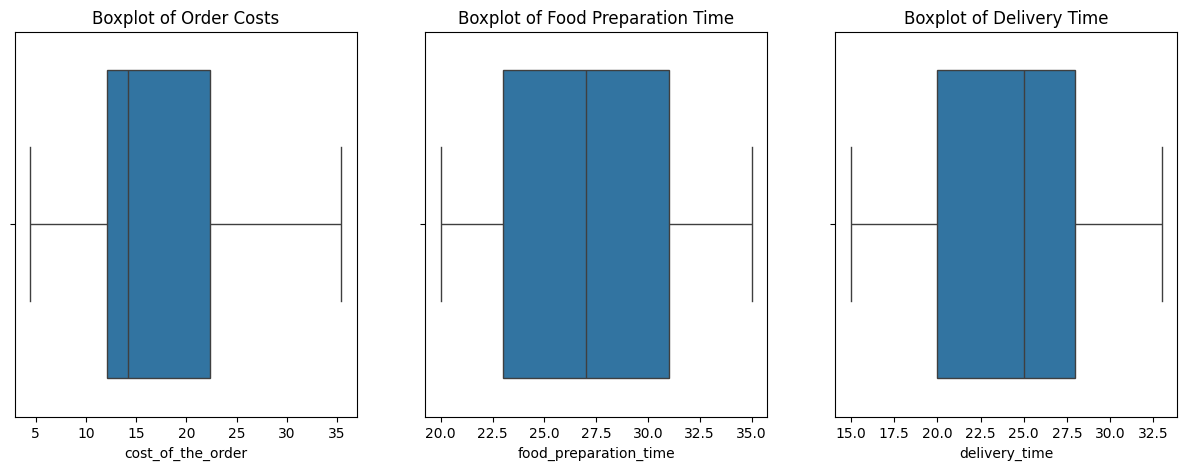

In [ ]:
###BoxPlots
import matplotlib.pyplot as plt
import seaborn as sns

#Boxplot for cost of order
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['cost_of_the_order'])
plt.title('Boxplot of Order Costs')
#Boxplot for food preparation time
plt.subplot(1, 3, 2)
sns.boxplot(x=df['food_preparation_time'])
plt.title('Boxplot of Food Preparation Time')
#Boxplot for delivery time
plt.subplot(1, 3, 3)
sns.boxplot(x=df['delivery_time'])
plt.title('Boxplot of Delivery Time')
plt.show()

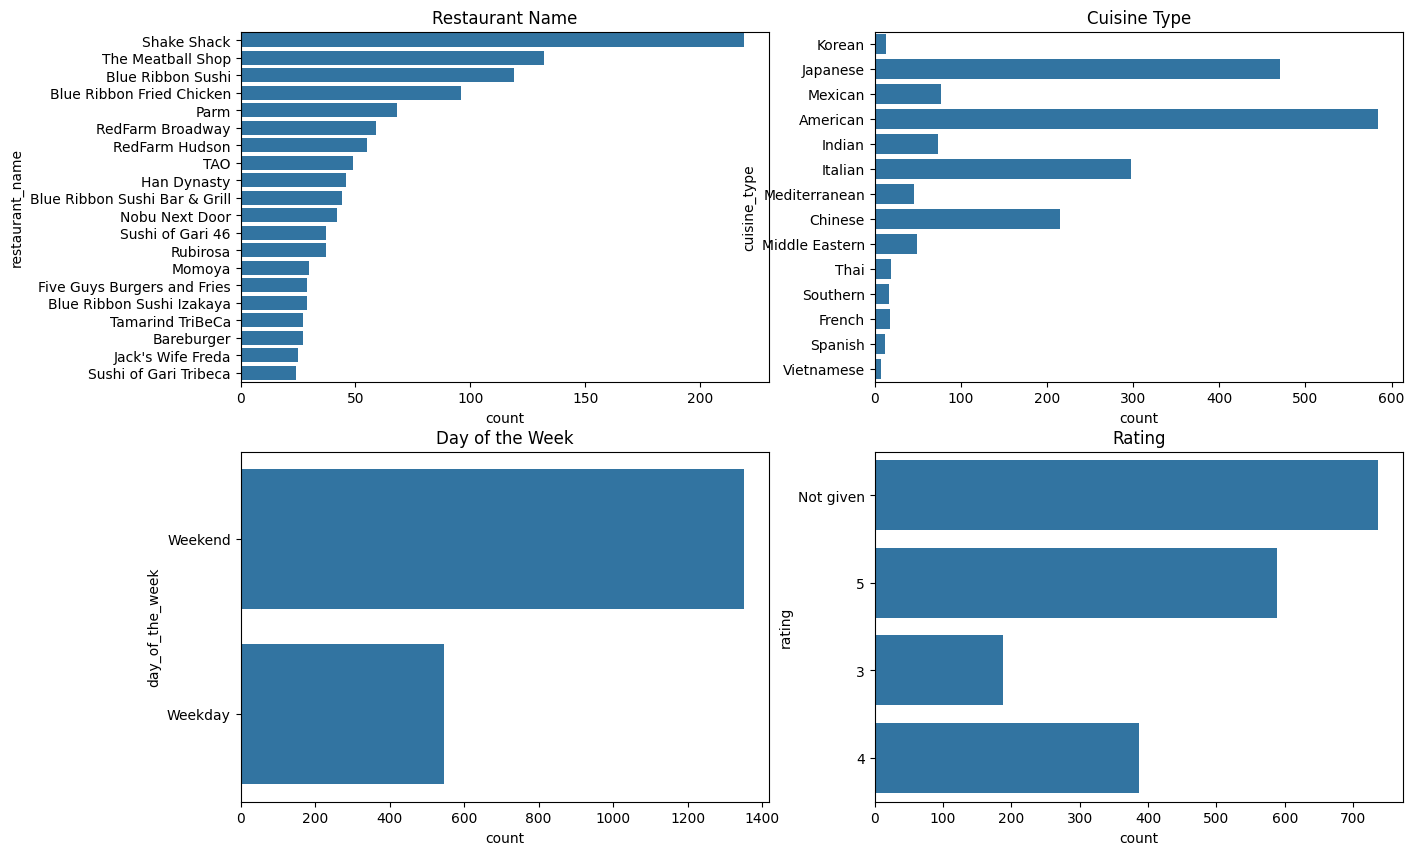

In [ ]:
#CountPlots
import matplotlib.pyplot as plt
import seaborn as sns

#countplots for restaurant name
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
restaurant_name_counts = df['restaurant_name'].value_counts().head(20).index
sns.countplot(y=df[df['restaurant_name'].isin(restaurant_name_counts)]['restaurant_name'], order=restaurant_name_counts)
plt.title('Restaurant Name')
#countplots for cuisine type
plt.subplot(2, 2, 2)
sns.countplot(y=df['cuisine_type'])
plt.title('Cuisine Type')
#countplots for day of the week
plt.subplot(2, 2, 3)
sns.countplot(y=df['day_of_the_week'])
plt.title('Day of the Week')
#countplots for rating
plt.subplot(2, 2, 4)
sns.countplot(y=df['rating'])
plt.title('Rating')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# top 5 restaurants in terms of number of orders received
top_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_restaurants.to_markdown(numalign="left"))

| restaurant_name           | count   |
|:--------------------------|:--------|
| Shake Shack               | 219     |
| The Meatball Shop         | 132     |
| Blue Ribbon Sushi         | 119     |
| Blue Ribbon Fried Chicken | 96      |
| Parm                      | 68      |


#### Observations:
The Top Five Restaurants are American, Italian and Japanese Cuisine Types.

This confirms our original observation of popular cuisine types. There's an opportunity for FoodHub to also analyze what percentage of revenue these businesses account for. To do that, we would need to determine the order costs from each of these businesses and apply a function to allow us to determine revenue for the business. We would then need to divide that by the total revenue for the company at that same given period and multiply by 100 to determine the percentage of revenue.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# determine what the most popular cuisine is on the weekends
weekend_cuisines = df[df['day_of_the_week'] == 'Weekend']
cuisine_counts = weekend_cuisines['cuisine_type'].value_counts()
most_popular_cuisine = cuisine_counts.idxmax()
cuisine_counts/len(weekend_cuisines)
print(f"The most popular cuisine on weekends is {most_popular_cuisine}, with 415 orders.")


The most popular cuisine on weekends is American, with 415 orders.


#### Observations:
The most popular cuisine type on the weekends is American and the most popular time for orders is the weekend. This piece of infomation is additative to our overview data.

It would be interesting to know the percentage of revenue that the American Cuisine Category accounts for during the weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Determine the percentage of orders that cost more than 20 dollars
expensive_orders = df[df['cost_of_the_order'] > 20]
total_orders = len(df)
expensive_orders_count = len(expensive_orders)
percentage_expensive_orders = (expensive_orders_count / total_orders) * 100
print(f"The percentage of orders that cost more than 20 dollars is {percentage_expensive_orders:.2f}%.")

The percentage of orders that cost more than 20 dollars is 29.24%.


#### Observations:

* <b>29.24%</b> of orders cost more than 20$, this means that 1/3 of orders are considered 'higher cost orders'

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# determine the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()
print(f"The mean order delivery time is {mean_delivery_time:.2f} minutes.")

The mean order delivery time is 24.16 minutes.


#### Observations:
* <b>24.16 minutes</b> is the mean order delivery time and the average food delivery time.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# determine top 3 most frequent customers and count number of orders
top_customers = df['customer_id'].value_counts().head(3)
print(top_customers.to_markdown(numalign="left"))

| customer_id   | count   |
|:--------------|:--------|
| 52832         | 13      |
| 47440         | 10      |
| 83287         | 9       |


#### Observations:

* The three customers that made the most orders in the data set account for 0.68%, 0.53%, and 0.47% of the total orders, respectively.
* The total percentage of orders for these customers is about 1.5% of the total number of orders.

It would be interesting to see the percentage of revenue that these customers accounted for. It would also be interesting to see if these customers are loyal to a particular restaurant, this would enable the service to personalize a discount voucher for the customer.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
| customer_id   | mean   | median   | min   | max   | order_count   |
|:--------------|:-------|:---------|:------|:------|:--------------|
| 1311          | 16.1   | 16.1     | 16.1  | 16.1  | 1             |
| 5139          | 22.26  | 22.26    | 22.26 | 22.26 | 1             |
| 5444          | 20.18  | 20.18    | 20.18 | 20.18 | 1             |
| 5693          | 8.3    | 8.3      | 8.3   | 8.3   | 1             |
| 6987          | 21.005 | 21.005   | 12.23 | 29.78 | 2             |


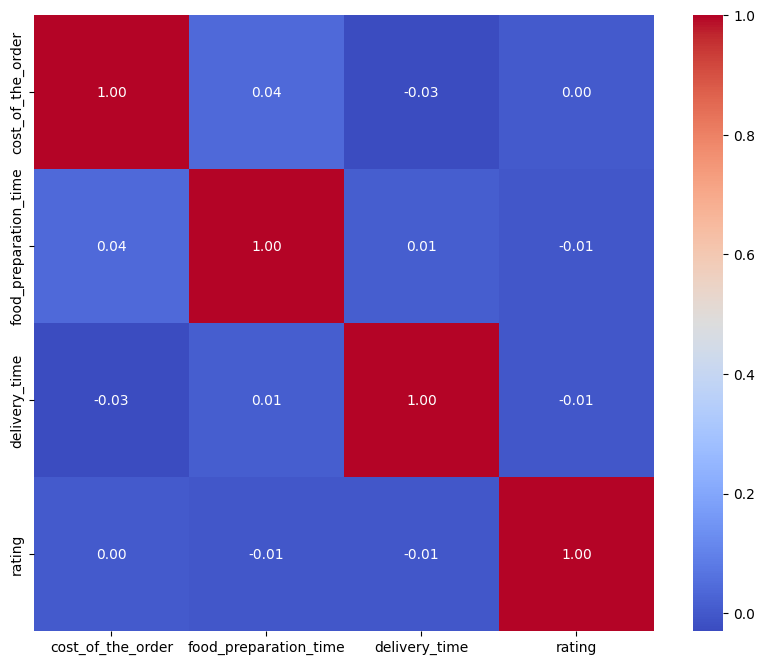

<Figure size 1000x600 with 0 Axes>

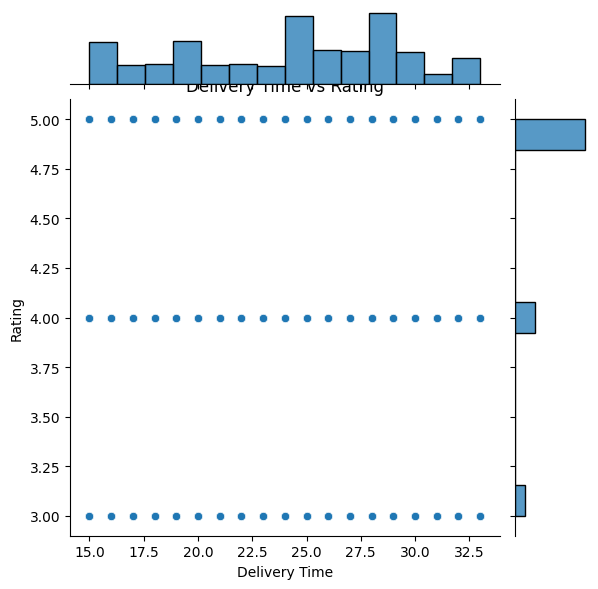

<Figure size 1000x600 with 0 Axes>

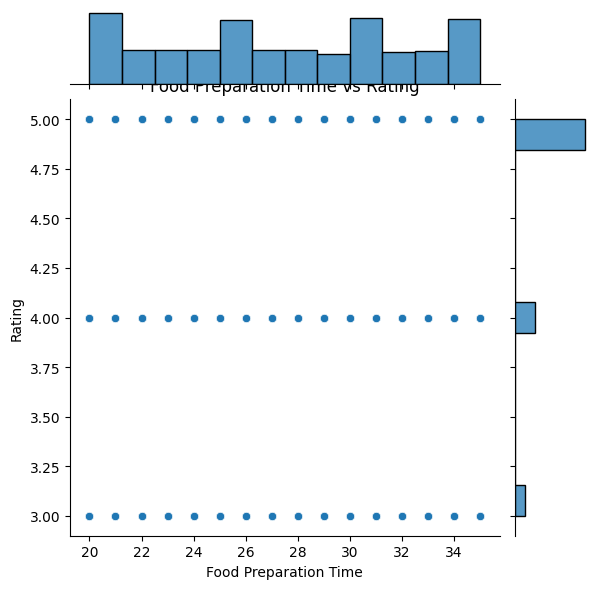

<Figure size 1000x600 with 0 Axes>

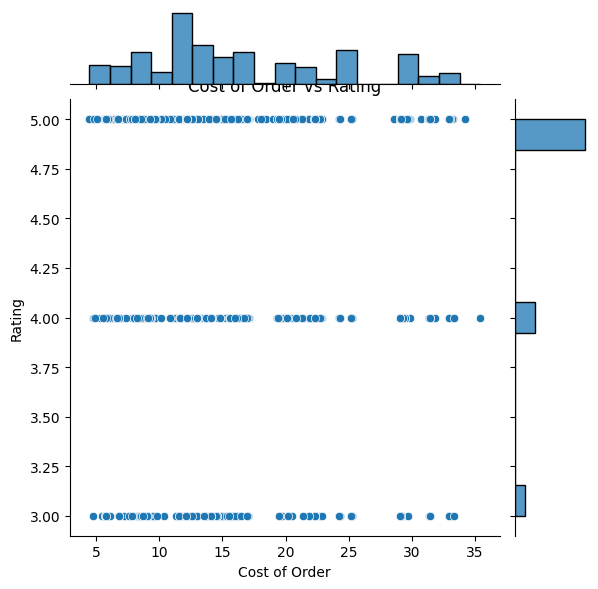

<Figure size 800x600 with 0 Axes>

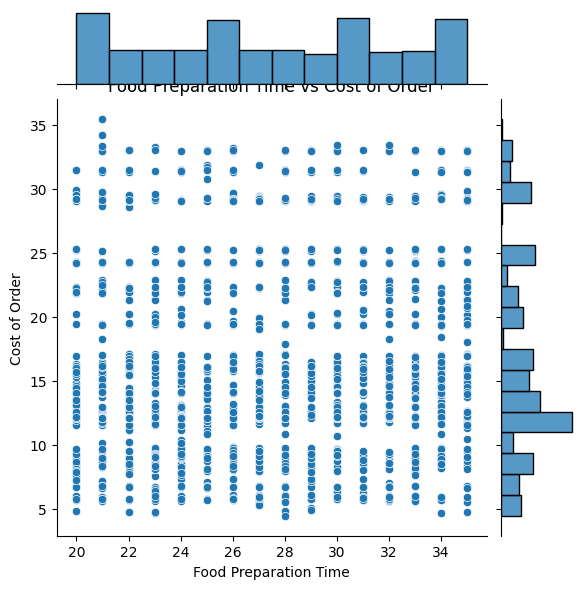

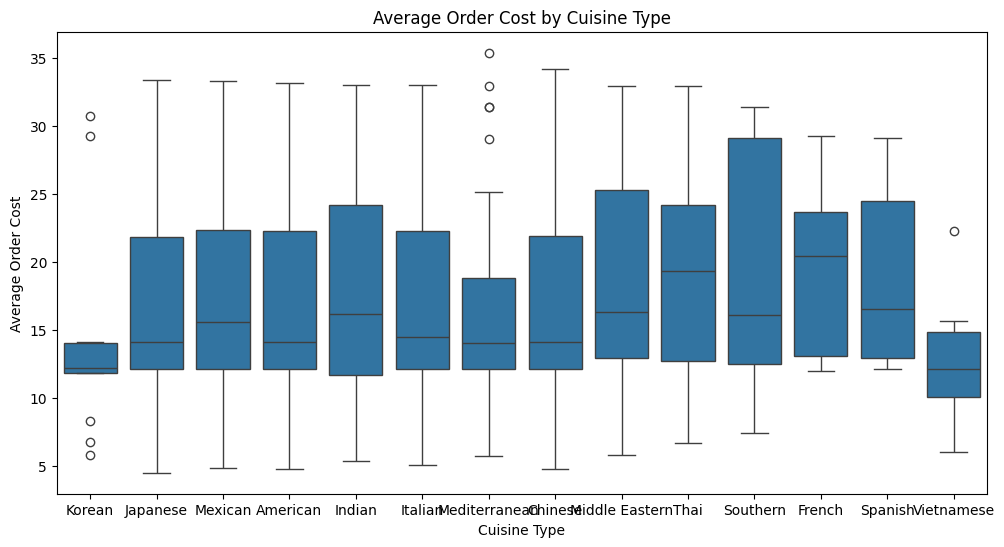

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

# Prepare the non-values to be calcuate in multivariate analysis
# Replace 'Not given' with NaN
df['rating'] = df['rating'].replace('Not given', pd.NA)
# Calculate the mode of 'rating' excluding 'Not given'
mode_rating = df['rating'].mode()[0]
# Replace 'Not given' with the mode of 'rating'
df['rating'] = df['rating'].fillna(mode_rating)
# Convert the 'rating column to numeric
df['rating'] = pd.to_numeric(df['rating'])

# Select the columns for correlation analysis
correlation_data = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']]

# Calculate the correlation matrix

correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Compare Ratings to other variables
# Is rating and order delivery time related?
plt.figure(figsize=(10, 6))
sns.jointplot(x='delivery_time', y='rating', data=df)
plt.title('Delivery Time vs Rating')
plt.xlabel('Delivery Time')
plt.ylabel('Rating')
#No key observations or insights.

# Is rating and food preparation time related?
plt.figure(figsize=(10, 6))
sns.jointplot(x='food_preparation_time', y='rating', data=df)
plt.title('Food Preparation Time vs Rating')
plt.xlabel('Food Preparation Time')
plt.ylabel('Rating')
#No key observations or insights.

# Is rating and cost of order related?
plt.figure(figsize=(10, 6))
sns.jointplot(x='cost_of_the_order', y='rating', data=df)
plt.title('Cost of Order vs Rating')
plt.xlabel('Cost of Order')
plt.ylabel('Rating')
#No key observations or insights.

# Compare Order Costs to other variables
# Is there a relationship between cost of order and food preparation time?
plt.figure(figsize=(8, 6))
sns.jointplot(x='food_preparation_time', y='cost_of_the_order', data=df)
plt.title('Food Preparation Time vs Cost of Order')
plt.xlabel('Food Preparation Time')
plt.ylabel('Cost of Order')
#No key observations or insights.

# Is there a relationship between order cost for different cuisine types?
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Average Order Cost by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Order Cost')
#American is the most popular cuisine but has normal distribution of order cosrs, French and thai have high mean order cost but not a top order category.

# Is there a relationship between Customer ID and order costs?

# Group by customer_id and calculate summary statistics of order costs
customer_order_summary = df.groupby('customer_id')['cost_of_the_order'].agg(mean='mean', median='median', min='min', max='max', order_count='count').reset_index()

# Display the summary statistics
print(customer_order_summary.head().to_markdown(index=False, numalign="left", stralign="left"))
# Not much we can do with this data



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# determine resturants with a rating count of more than 50
rating_counts = df['restaurant_name'].value_counts()
# determine the restaurants with an average rating of 4
filtered_restaurants = rating_counts[rating_counts > 50].index
# determine the restaurants that fulfill both criteria
filtered_restaurants
#formatted output
print("Shake Shack, the Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm, RedFarm Broadway, RedFarm Hudson are eligible to get the promotional offer.")

Shake Shack, the Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm, RedFarm Broadway, RedFarm Hudson are eligible to get the promotional offer.


#### Observations:
* There are 7 restaurants that are eligible to get the promotional offer: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm, RedFarm Broadway, RedFarm Hudson.

Majority of these restaurants are under the american cuisine type and that's the most popular cuisine type. It also includes the top 5 most popular restaurants.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# determine the number of orders that are greater than 20 dollars
high_cost_orders = df[df['cost_of_the_order'] > 20]
high_cost_orders_count = len(high_cost_orders)
# determine the revenue of higher cost orders
high_cost_orders_revenue = high_cost_orders_count * 0.25
#determine the number of orders that are greater than 5 dollars
low_cost_orders = df[df['cost_of_the_order'] > 5]
low_cost_orders_count = len(low_cost_orders)
#determine the revenue of lower cost orders
low_cost_orders_revenue = low_cost_orders_count * 0.15
#determine the total revenue
total_revenue = high_cost_orders_revenue + low_cost_orders_revenue
print(f"The total revenue generated by the company across all orders is ${total_revenue:.2f}.")



The total revenue generated by the company across all orders is $422.10.


#### Observations:
* The total revenue generated by the company is <b>422.10</b> and revenue is directly influenced by order costs
* Southern, French and Mediteranean Food account for the highest order costs.
* American, Japanese and Italian are the most popular cuisine types, but most orders are under 20$ which could hurt FoodHub from capitalizing on the popularity of these businesses.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
import pandas as pd

#Read the CSV file
df=pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

#Calculate the total time for reach order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

#Determine the number of orders where total time is greater than 60 minutes
orders_over_60_minutes = df[df['total_time'] > 60]
total_orders = len(df)
orders_over_60_minutes_count = len(orders_over_60_minutes)
percentage_orders_over_60_minutes = (orders_over_60_minutes_count / total_orders) * 100
print(f"The percentage of orders that take more than 60 minutes to get delivered is {percentage_orders_over_60_minutes:.2f}%.")



The percentage of orders that take more than 60 minutes to get delivered is 10.54%.


#### Observations:
* <b>10.54%</b> of orders take more than 60 minutes to get delivered from the time they are ordered.

This means that 9 out of 10 orders are delivered in under an hour from when they are first ordered in the app. This is a helpful statistic the company can share with marketing to advertise it's speedy service.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# determine the delivery time on weekdays and weekends
weekday_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time']
weekend_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time']
print(f"The mean delivery time on weekdays is {weekday_delivery_time.mean():.2f} minutes.")
print(f"The mean delivery time on weekends is {weekend_delivery_time.mean():.2f} minutes.")
# determine the variance from weekends and weekdays
print(f"The variance from weekdays is {weekday_delivery_time.var():.2f} minutes.")
print(f"The variance from weekends is {weekend_delivery_time.var():.2f} minutes.")

The mean delivery time on weekdays is 28.34 minutes.
The mean delivery time on weekends is 22.47 minutes.
The variance from weekdays is 8.36 minutes.
The variance from weekends is 21.43 minutes.


#### Observations:
* The average delivery time on the weekdays is 28.34 minutes vs. 22.47 minutes on the weekends, which means that on average delivery on the weekday is slower than weekends
* The variance for weekday delivery is 8 minutes and the variance for weekends is 21.43 minutes, this means that there is less variance for weekday deliveries than weekends.

This data shoes that while weekday delivery is slower, there is a greater variance on weekends. There are significantly more weekend orders than weekday orders so it's hard to predict if there are external factors that influence the delivery time on weekends or weekdays. It would be beneficial for the organization to see if factors such as traffic influence delivery time, but delivery time and ratings have no significant relationship, and most orders are delivered under an hour, it would not be advisable for the business to consider making changes to increase the delivery speed at this time.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

### User Behavior
* <b> Popular Cuisine Types and Restaurants:</b> American (30% of orders), Japanese (24% of orders) and Italian (15%) are the most popular cuisine types for FoodHub Customers and the most popular restaurants of Shake Shack, Meatball Shop, and Blue Ribbon Sushi, reflect that as well.
* <b> Most orders happen over the weekend:</b> 71% of orders occurred on the weekend, and the most popular food on the weekend was American.
* <b> Not that many people rate their orders, but if they do it's most likely to be posisive:</b> 736 of orders were not rated, accounting for around 39% of the total orders. a Rating of 5 was the second most common rating.

### Service Quality
* <b> Most Foodhub orders are delivered under an hour:</b> only 10.54% of FoodHub orders are delivered in over an hour from the time the order is placed. The average food delivery time is 24 minutes.
* <b> Not that many people rate their orders, but if they do it's most likely to be positive:</b> 736 of orders were not rated, accounting for around 39% of the total orders. a Rating of 5 was the second most common rating.

### Revenue Opportunities
* The average order cost is less than the 20$ minimum to trigger a higher percentage of revenue for the service
* Higher order costs come from less popular cuisines
* The highest repeat customers only account for 1% of the total orders

### Recommendations:
* <b> FoodHub has very little revenue</b>: The company generated 422. 10 in revenue for 1898 orders. This means that in order for the company to achieve higher profits with the current revenue model, they will need to increase the number of orders significantly.
*  <b> The average order cost is less than the 20$ minimum to trigger a higher percentage of revenue for the service:</b> The company could consider a revenue model where it can generate higher revenue from popular cuisines, weekend orders or offer further discounts to repeat customers if it wants to increase profits without incurring additional marketing spend. There is no data about customer acquisition costs, but these areas offer opportunities for the company to optimize it's revenue model to make more profits.
* <b>Encourage users to provide more data on customer service aka rating:</b> Most customers either leave a rating of 5 or leave no rating at all. There's an opportunity for us to learn more about our existing customers wants and needs through customer satisfaction surveys, however the current method of collecting data is not comprehensive enough, nor is it well utilized.
*<b> Delivery Speed, Restaurant Diversity and High Ratings are key Marketing Value Props:</b> Most orders are delivered under an hour, most orders come from different cuisine types but there are 14 unique cuisines and 178 restaurants. Although most orders are not rated, the second most popular category is a rating of 5 which is the highers, thus it can be used as a marketing value prop.
* <b>Continue to drive revenue through promotions with businesses:</b> Offering free advertisement to restaurants with high order volumes and positive ratings encourages already frequented restaurants to rank higher among users. This will allow the Food Agregator to continue to show restaurants that people enjoy using and put a higher cost on new restaurants to advertise to rank higher.
*<b>Offer promotional offers to encourage repeat customers:</b> Less than 2% of orders came from high volume repeat customers, there's an opportunity to offer promotional offers for popular restuarants, like Shake Shack, to encourage repeat customer behavior and encourage new user adoption.

---